##### O arquivo CSV contém uma variedade de colunas com diferentes tipos de dados. Para uma análise mais profunda, vamos seguir estes passos:

    Exploração Inicial: Observar a estrutura geral dos dados, identificando tipos de variáveis e possíveis valores ausentes.

    Limpeza e Preparação dos Dados: Tratar valores ausentes, remover colunas irrelevantes e preparar os dados para análise.

    Análise Exploratória de Dados (EDA): Realizar análises estatísticas e visuais para compreender tendências, padrões e relações nos dados.

    Classes e Funções Customizadas: Criar classes e funções para encapsular partes da análise, facilitando a reutilização e a organização do código.

    Visualização de Dados: Gerar gráficos para ilustrar as descobertas da análise.

In [1]:
# Vamos começar com a exploração inicial para entender melhor os dados. Depois, passaremos para os próximos passos, incluindo a limpeza dos dados e a análise exploratória.

import pandas as pd

arquivo_csv = 'database.csv'
data = pd.read_csv(arquivo_csv)
data
# Exibindo as primeiras linhas do arquivo para entender sua estrutura
#data.head()

C:\Users\alexs\AppData\Local\Temp\ipykernel_7848\886440192.py:6: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(arquivo_csv)


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49.0,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10.0,...,1,0,0,0,0,0,0,0,0,0


#### As primeiras linhas do conjunto de dados indicam que se trata de um registro de incidentes, possivelmente relacionados a aeronaves, com detalhes sobre operadores, tipos de aeronaves, e outros aspectos técnicos.

##### Para prosseguir, vamos limpar e preparar os dados, o que inclui:

    Remover colunas com alta porcentagem de valores ausentes.
    Tratar outros valores ausentes conforme necessário.
    Selecionar colunas relevantes para a análise.

In [2]:
# Definindo a função para imprimir as informações da análise inicial
def imprimir_informacoes_iniciais(data):
    num_linhas = data.shape[0]
    num_colunas = data.shape[1]
    tipos_dados = data.dtypes.value_counts()
    colunas_valores_ausentes = data.isnull().sum().sort_values(ascending=False)

    print("A análise inicial revela algumas informações importantes sobre o conjunto de dados:\n")
    print(f"Número de Linhas: {num_linhas}")
    print(f"Número de Colunas: {num_colunas}")
    print("\nTipos de Dados:")
    for tipo, qtd in tipos_dados.items():
        print(f"{tipo}: {qtd} colunas")
    
    print("\nColunas com Valores Ausentes: Muitas colunas têm uma quantidade significativa de valores ausentes, algumas das quais quase completamente vazias (como 'Injuries', 'Fatalities', 'Engine4 Position', 'Engine3 Position', etc.).\n")
    print(colunas_valores_ausentes)
# Chamando a função para imprimir as informações
imprimir_informacoes_iniciais(data)


A análise inicial revela algumas informações importantes sobre o conjunto de dados:

Número de Linhas: 174104
Número de Colunas: 66

Tipos de Dados:
int64: 34 colunas
object: 22 colunas
float64: 10 colunas

Colunas com Valores Ausentes: Muitas colunas têm uma quantidade significativa de valores ausentes, algumas das quais quase completamente vazias (como 'Injuries', 'Fatalities', 'Engine4 Position', 'Engine3 Position', etc.).

Injuries             173875
Fatalities           173539
Engine4 Position     171012
Engine3 Position     162445
Speed                102846
                      ...  
Windshield Damage         0
Nose Strike               0
Nose Damage               0
Engine1 Strike            0
Other Damage              0
Length: 66, dtype: int64


##### Vamos agora realizar a Análise Exploratória de Dados (EDA). Esta análise incluirá:

    Estatísticas descritivas básicas.
    Análises de frequência para operadores de aeronaves e fases de voo.
    Visualizações gráficas para entender melhor os padrões nos dados.

In [3]:
# Limpeza e preparação dos dados

# Removendo colunas com alta porcentagem de valores ausentes
porcentagem_valores_ausentes = data.isnull().mean()
colunas_para_remover = porcentagem_valores_ausentes[porcentagem_valores_ausentes > 0.5].index
data_limpa = data.drop(columns=colunas_para_remover)

# Selecionando algumas colunas relevantes para análise
colunas_relevantes = ['Incident Year', 'Incident Month', 'Incident Day', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make', 'Aircraft Model', 'Engine Type', 'Airport', 'Flight Phase']
data_limpa = data_limpa[colunas_relevantes]

# Tratando valores ausentes nas colunas restantes (substituindo por 'Unknown' ou valores mais comuns)
for coluna in colunas_relevantes:
    if data_limpa[coluna].dtype == 'object':
        data_limpa[coluna].fillna('Unknown', inplace=True)
    else:
        data_limpa[coluna].fillna(data_limpa[coluna].mode()[0], inplace=True)

# Visão geral dos dados após a limpeza
print(data_limpa.info(), data_limpa.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Incident Year   174104 non-null  int64 
 1   Incident Month  174104 non-null  int64 
 2   Incident Day    174104 non-null  int64 
 3   Operator        174104 non-null  object
 4   Aircraft        174104 non-null  object
 5   Aircraft Type   174104 non-null  object
 6   Aircraft Make   174104 non-null  object
 7   Aircraft Model  174104 non-null  object
 8   Engine Type     174104 non-null  object
 9   Airport         174104 non-null  object
 10  Flight Phase    174104 non-null  object
dtypes: int64(3), object(8)
memory usage: 14.6+ MB
None    Incident Year  Incident Month  Incident Day         Operator   Aircraft  \
0           1990               1             1  DELTA AIR LINES  B-757-200   
1           1990               1             1     HAWAIIAN AIR       DC-9   
2           19

In [4]:
# Calculando as estatísticas descritivas básicas para o ano, mês e dia do incidente
estatisticas_ano = data['Incident Year'].describe()
estatisticas_mes = data['Incident Month'].describe()
estatisticas_dia = data['Incident Day'].describe()

estatisticas_ano, estatisticas_mes, estatisticas_dia

(count    174104.000000
 mean       2006.036392
 std           6.747708
 min        1990.000000
 25%        2001.000000
 50%        2007.000000
 75%        2012.000000
 max        2015.000000
 Name: Incident Year, dtype: float64,
 count    174104.000000
 mean          7.171840
 std           2.790152
 min           1.000000
 25%           5.000000
 50%           8.000000
 75%           9.000000
 max          12.000000
 Name: Incident Month, dtype: float64,
 count    174104.000000
 mean         15.712264
 std           8.799405
 min           1.000000
 25%           8.000000
 50%          16.000000
 75%          23.000000
 max          31.000000
 Name: Incident Day, dtype: float64)

In [6]:
# Análise Exploratória de Dados (EDA)

# Estatísticas Descritivas Básicas para as colunas numéricas
estatisticas_descritivas = data_limpa.describe(include=[int])

# Análise de frequência para os operadores de aeronaves
frequencia_operadores = data_limpa['Operator'].value_counts().head(10)

# Análise de frequência para as fases de voo
frequencia_fases_voo = data_limpa['Flight Phase'].value_counts().head(10)

estatisticas_descritivas, frequencia_operadores, frequencia_fases_voo


(       Incident Year  Incident Month   Incident Day
 count  174104.000000   174104.000000  174104.000000
 mean     2006.036392        7.171840      15.712264
 std         6.747708        2.790152       8.799405
 min      1990.000000        1.000000       1.000000
 25%      2001.000000        5.000000       8.000000
 50%      2007.000000        8.000000      16.000000
 75%      2012.000000        9.000000      23.000000
 max      2015.000000       12.000000      31.000000,
 UNKNOWN               39540
 BUSINESS              14271
 SOUTHWEST AIRLINES    13864
 UNITED AIRLINES       13207
 AMERICAN AIRLINES     10358
 MILITARY               8046
 FEDEX EXPRESS          6289
 DELTA AIR LINES        6155
 UPS AIRLINES           4534
 1US AIRWAYS            3960
 Name: Operator, dtype: int64,
 Unknown         55302
 APPROACH        48275
 TAKEOFF RUN     21953
 LANDING ROLL    20762
 CLIMB           19692
 DESCENT          3174
 EN ROUTE         2989
 LANDING           626
 TAXI            

### A análise exploratória de dados fornece algumas informações interessantes:

##### Estatísticas Descritivas Básicas:
    Ano do Incidente: Varia de 1990 a 2015.
    Mês do Incidente: Distribuído ao longo de todos os meses, com média em torno de julho.
    Dia do Incidente: Distribuído uniformemente ao longo do mês.
#### Análise de Frequência para Operadores de Aeronaves
##### Operadores mais frequentes:
    'UNKNOWN': 39.540 incidentes
    'BUSINESS': 14.271 incidentes
    'SOUTHWEST AIRLINES': 13.864 incidentes
    'UNITED AIRLINES': 13.207 incidentes
    'AMERICAN AIRLINES': 10.358 incidentes
#### Análise de Frequência para Fases de Voo
##### Fases de voo mais comuns:
    'Unknown': 55.302 incidentes
    'APPROACH': 48.275 incidentes
    'TAKEOFF RUN': 21.953 incidentes
    'LANDING ROLL': 20.762 incidentes
    'CLIMB': 19.692 incidentes
    
Agora, vamos visualizar graficamente alguns desses dados para obter insights adicionais. Geraremos gráficos para as distribuições dos operadores de aeronaves, além de um gráfico de linha temporal para ver a tendência de incidentes ao longo dos anos.

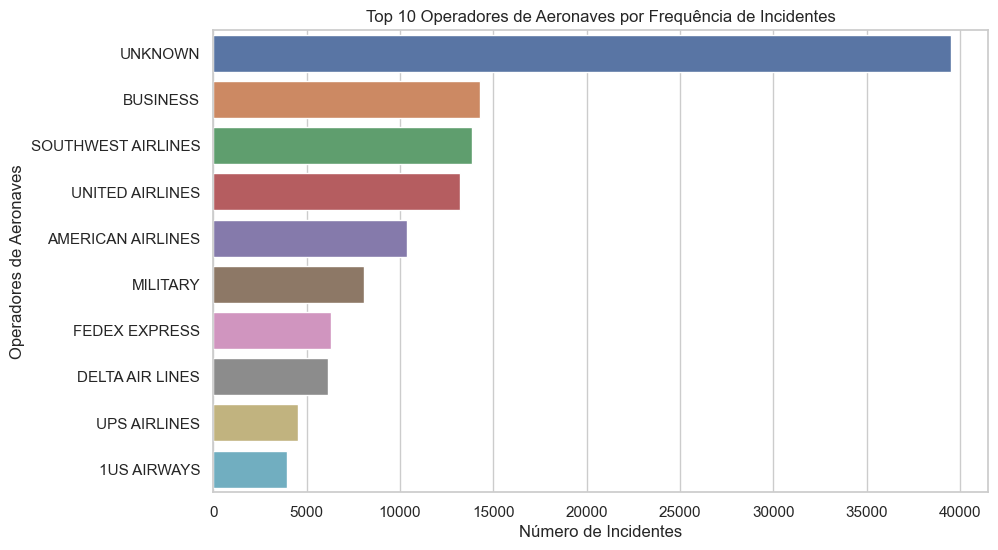

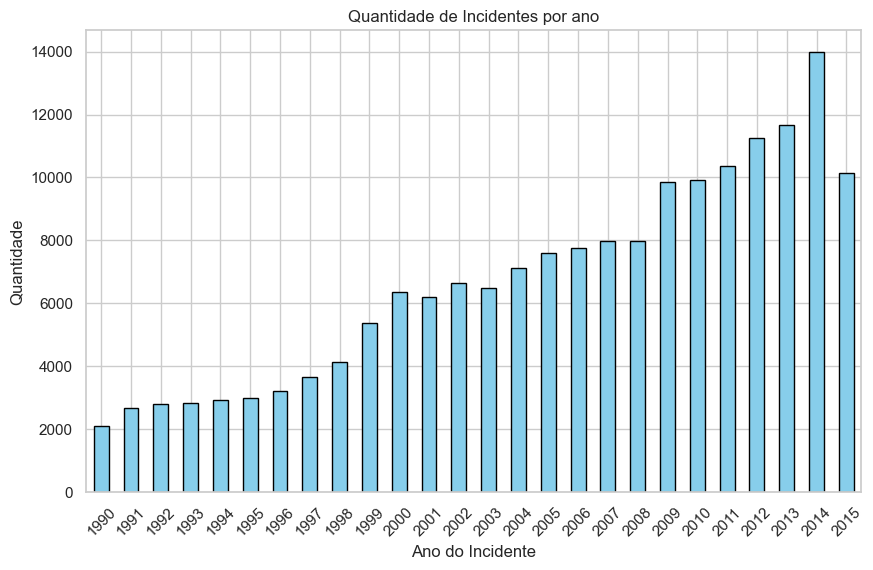

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo para os gráficos
sns.set(style="whitegrid")

# Gráfico de barras para os operadores de aeronaves mais frequentes
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencia_operadores.values, y=frequencia_operadores.index)
plt.title('Top 10 Operadores de Aeronaves por Frequência de Incidentes')
plt.xlabel('Número de Incidentes')
plt.ylabel('Operadores de Aeronaves')
plt.show()

# Contagem na coluna 'Incident Year'
contagem_incident_year = data['Incident Year'].value_counts()
# Gráfico de barras
plt.figure(figsize=(10, 6))
contagem_incident_year.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona rótulos e título ao gráfico
plt.xlabel('Ano do Incidente')
plt.xticks(rotation=45)
plt.ylabel('Quantidade')
plt.title('Quantidade de Incidentes por ano')

# Exibe o gráfico
plt.show()


C:\Users\alexs\AppData\Local\Temp\ipykernel_7848\3677572562.py:8: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.file_path)


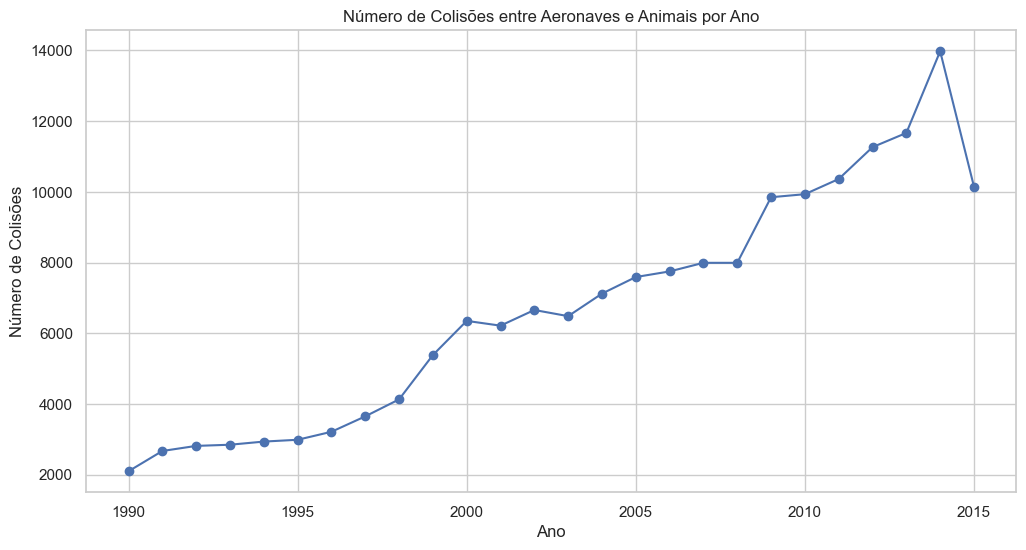

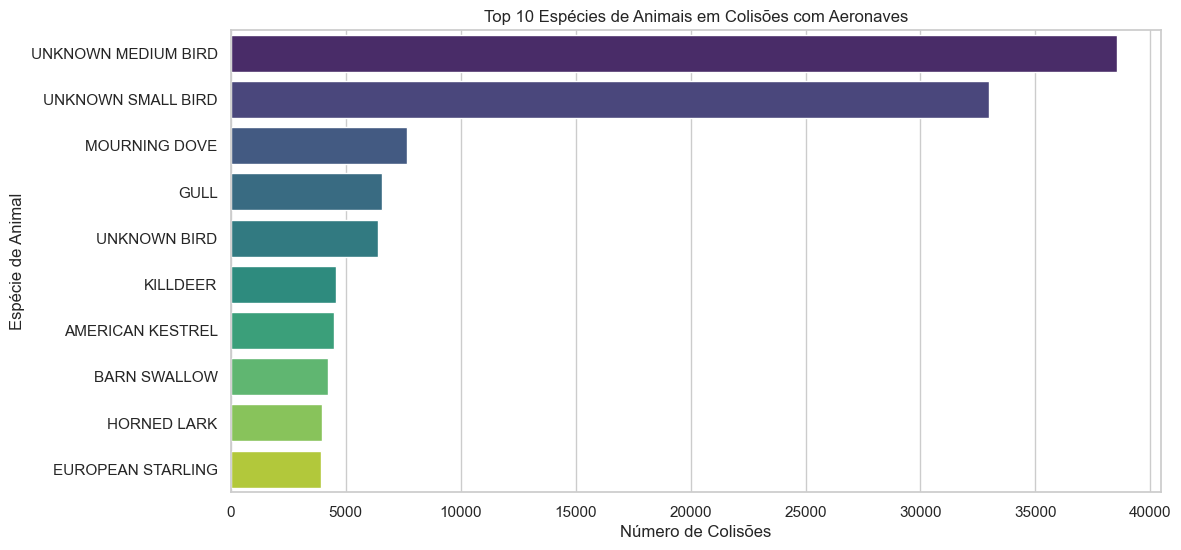

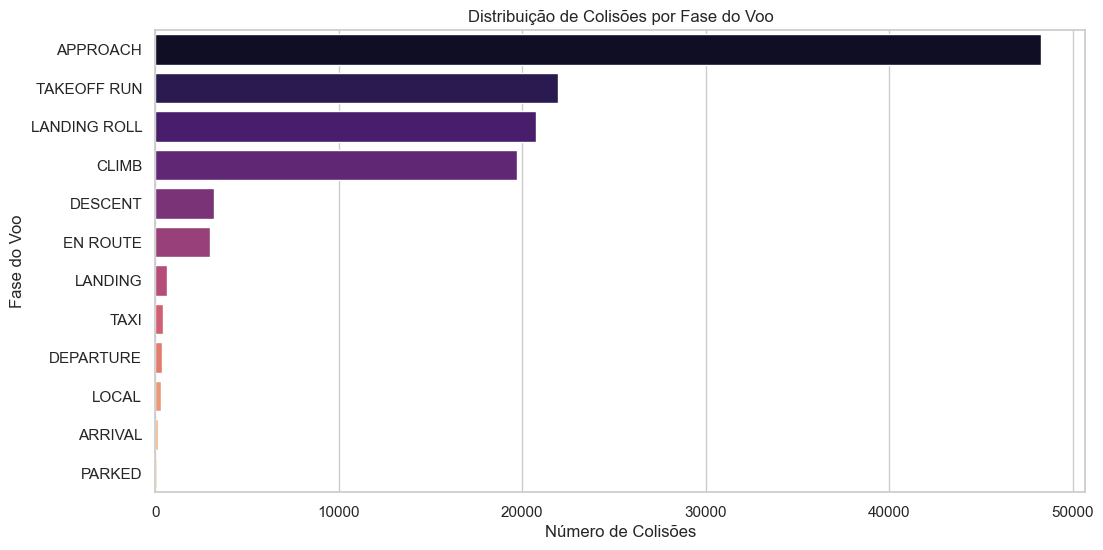

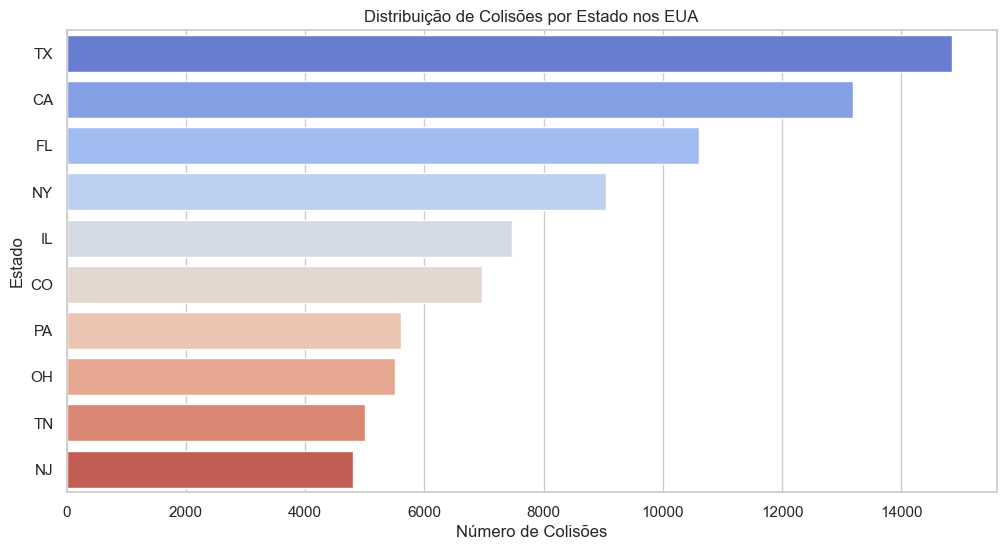

In [10]:
class DataVisualizer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        """Carrega os dados do arquivo CSV."""
        self.data = pd.read_csv(self.file_path)

    def plot_incidents_over_time(self):
        """Plota o número de incidentes ao longo do tempo."""
        incidentes_por_ano = self.data['Incident Year'].value_counts().sort_index()
        plt.figure(figsize=(12, 6))
        plt.plot(incidentes_por_ano.index, incidentes_por_ano.values, marker='o', color='b')
        plt.title('Número de Colisões entre Aeronaves e Animais por Ano')
        plt.xlabel('Ano')
        plt.ylabel('Número de Colisões')
        plt.grid(True)
        plt.show()

    def plot_common_species(self):
        """Plota as espécies de animais mais comuns em colisões."""
        espécies_mais_comuns = self.data['Species Name'].value_counts().head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=espécies_mais_comuns.values, y=espécies_mais_comuns.index, palette='viridis')
        plt.title('Top 10 Espécies de Animais em Colisões com Aeronaves')
        plt.xlabel('Número de Colisões')
        plt.ylabel('Espécie de Animal')
        plt.show()

    def plot_collisions_by_flight_phase(self):
        """Plota a distribuição de colisões por fase do voo."""
        colisoes_por_fase_voo = self.data['Flight Phase'].value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=colisoes_por_fase_voo.values, y=colisoes_por_fase_voo.index, palette='magma')
        plt.title('Distribuição de Colisões por Fase do Voo')
        plt.xlabel('Número de Colisões')
        plt.ylabel('Fase do Voo')
        plt.show()

    def plot_collisions_by_state(self):
        """Plota a distribuição de colisões por estado."""
        colisoes_por_estado = self.data['State'].value_counts().head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=colisoes_por_estado.values, y=colisoes_por_estado.index, palette='coolwarm')
        plt.title('Distribuição de Colisões por Estado nos EUA')
        plt.xlabel('Número de Colisões')
        plt.ylabel('Estado')
        plt.show()

# Instanciando a classe e utilizando os métodos
file_path = 'database.csv'
visualizer = DataVisualizer(file_path)
visualizer.load_data()
visualizer.plot_incidents_over_time()
visualizer.plot_common_species()
visualizer.plot_collisions_by_flight_phase()
visualizer.plot_collisions_by_state()



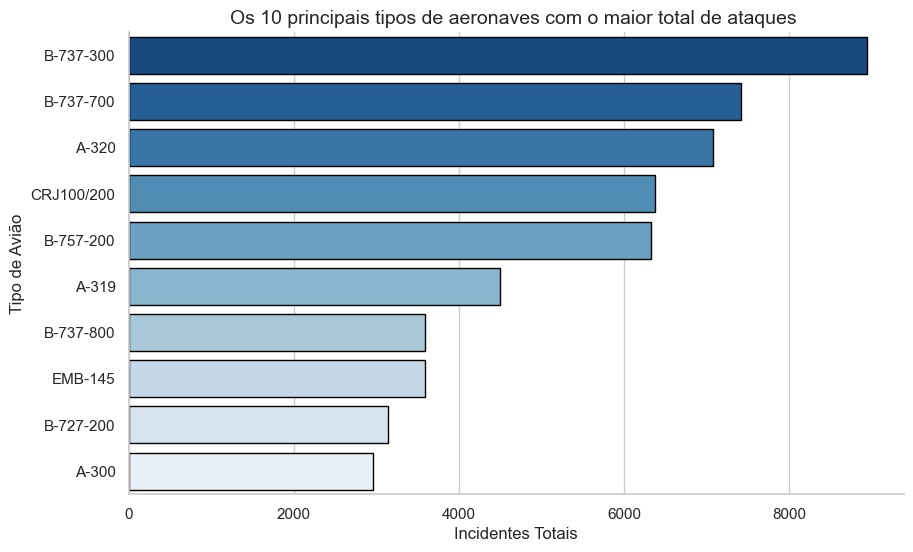

In [13]:
# Que tipo de aeronave é mais afetada?

# Manipulação de dados usando pandas
strikes_by_type = (
    data.groupby('Aircraft')
    .size()
    .reset_index(name='total_strikes')
    .replace('UNKNOWN', pd.NA)
    .dropna()
)

# Selecione os 10 principais tipos de aeronaves com o maior total_strikes
top_types = strikes_by_type.nlargest(10, 'total_strikes')

# Visualização de dados usando seaborn e matplotlib
plt.figure(figsize=(10, 6))

# Gráfico de barras com preenchimento gradiente
sns.barplot(x='total_strikes', y='Aircraft', data=top_types, palette='Blues_r', edgecolor='black')

# Personalização de plotagem
plt.xlabel('Incidentes Totais', fontsize=12)
plt.ylabel('Tipo de Avião', fontsize=12)
plt.title('Os 10 principais tipos de aeronaves com o maior total de ataques ', fontsize=14)
sns.despine()

plt.show()


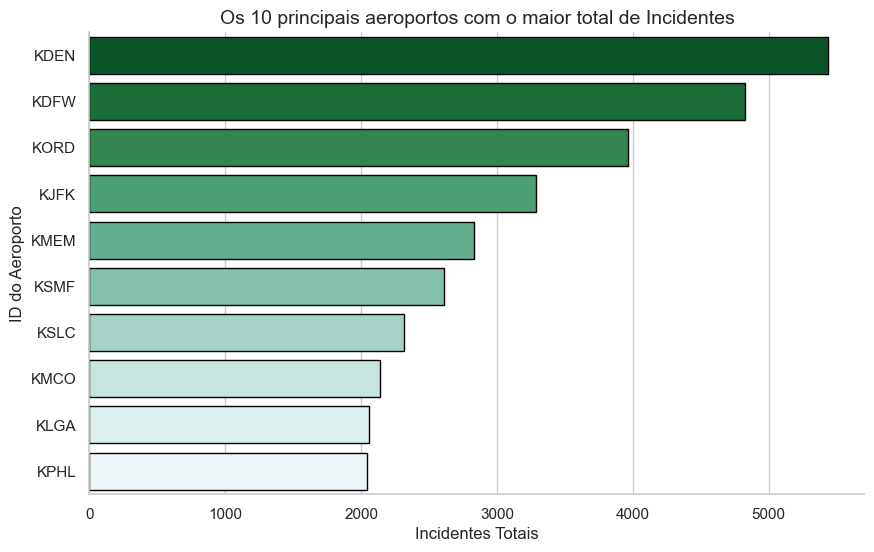

In [18]:
# Quais aeroportos apresentam mais acidentes?

# Manipulação de dados usando pandas
strikes_by_airport = (
    data.groupby('Airport ID')
    .size()
    .reset_index(name='total_strikes')
    .replace('ZZZZ', pd.NA)
    .dropna()
)

# Selecione os 10 principais aeroportos com o maior total_strikes
top_airports = strikes_by_airport.nlargest(10, 'total_strikes')

# Visualização de dados usando seaborn e matplotlib
plt.figure(figsize=(10, 6))

# Gráfico de barras com preenchimento gradiente
sns.barplot(x='total_strikes', y='Airport ID', data=top_airports, palette='BuGn_r', edgecolor='black')

# Personalização de plotagem
plt.xlabel('Incidentes Totais', fontsize=12)
plt.ylabel('ID do Aeroporto', fontsize=12)
plt.title('Os 10 principais aeroportos com o maior total de Incidentes', fontsize=14)
sns.despine()

plt.show()


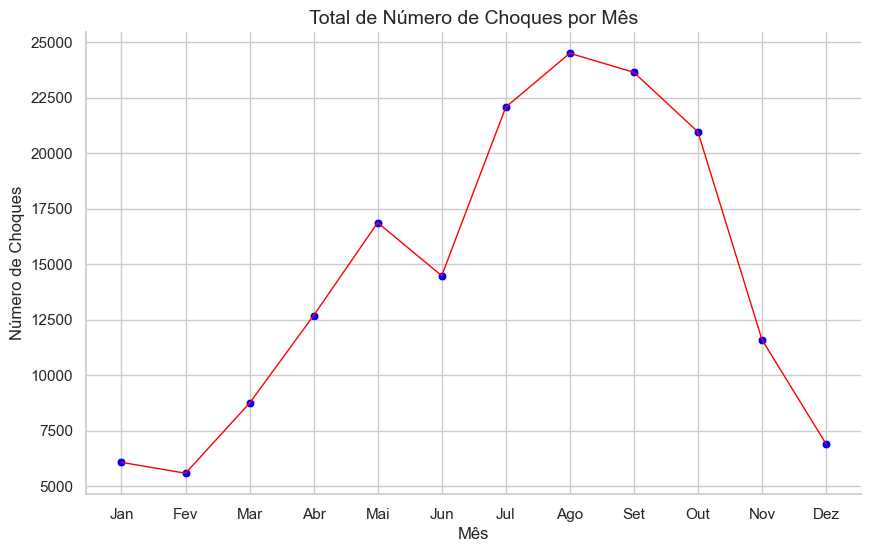

In [11]:
# Número de acidentes por mês.

# Manipulação de dados usando pandas
strikes_by_mon = data.groupby('Incident Month').size().reset_index(name='total_strikes')

# Visualização de dados usando seaborn e matplotlib
plt.figure(figsize=(10, 6))

# Gráfico de linha
sns.lineplot(x='Incident Month', y='total_strikes', data=strikes_by_mon, color='red', linewidth=1)

# Gráfico de dispersão
sns.scatterplot(x='Incident Month', y='total_strikes', data=strikes_by_mon, color='blue', s=40)

# Personalização de plotagem
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Choques', fontsize=12)
plt.title('Total de Número de Choques por Mês', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.yticks()
sns.despine()

plt.show()


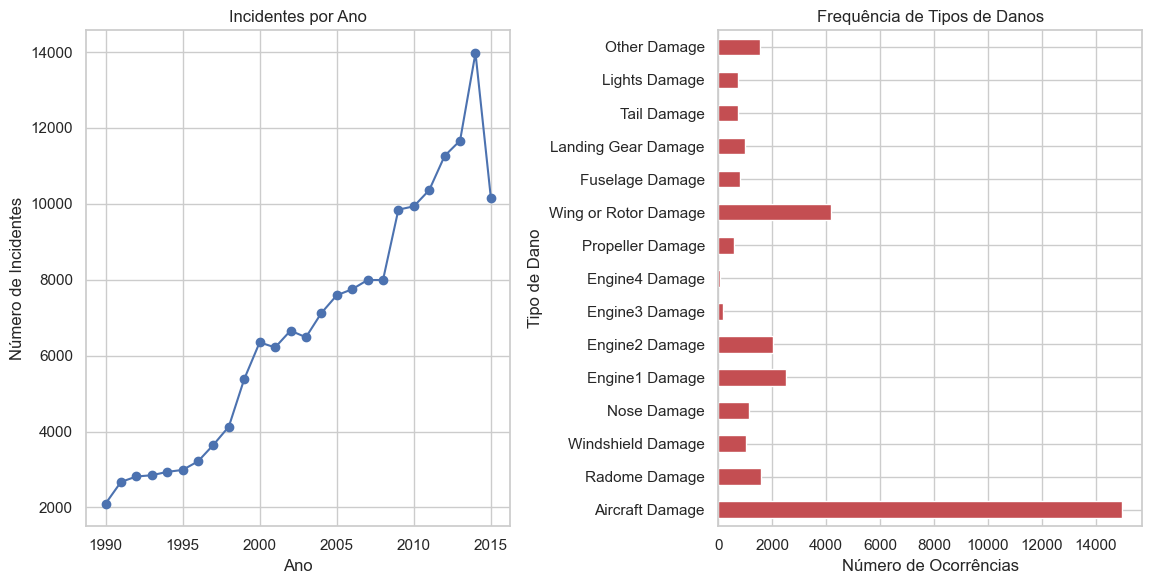

In [12]:
# Análise de Tendências ao Longo do Tempo
# Calculando o número total de incidentes por ano
incidents_by_year = data.groupby('Incident Year').size()

# Análise de Danos
# Calculando a frequência de cada tipo de dano
damage_columns = [col for col in data.columns if 'Damage' in col]
damage_data = data[damage_columns].sum()

# Relações entre Variáveis
# Correlação entre a massa da aeronave e a frequência de danos
correlation_data = data[['Aircraft Mass'] + damage_columns].corr()

# Criando os gráficos
plt.figure(figsize=(18, 6))

# Gráfico de Tendências ao Longo do Tempo
plt.subplot(1, 3, 1)
plt.plot(incidents_by_year, marker='o', linestyle='-', color='b')
plt.title('Incidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Incidentes')

# Gráfico de Análise de Danos
plt.subplot(1, 3, 2)
damage_data.plot(kind='barh', color='r')
plt.title('Frequência de Tipos de Danos')
plt.ylabel('Tipo de Dano')
plt.xlabel('Número de Ocorrências')

plt.tight_layout()
plt.show()